**Let's first import the required libraries**

In [2]:
import pandas as pd
import numpy as np 
import pandas_profiling as pp 

let's load the feature matrixes

In [3]:
dfeat= pd.read_csv('/home/sid2018-1/Bureau/Défi IA anomaly Detection/feattrain')

In [4]:
dfeatest= pd.read_csv('/home/sid2018-1/Bureau/Défi IA anomaly Detection/featvalid')

let's do some Exploratory data analysis on the features using pandas profiling

In [237]:
profile = dfeat.profile_report(title='Pandas Profiling Report on train anomaly detection')
profile.to_file(output_file = "/home/sid2018-1/Bureau/Défi IA anomaly Detection/feattrainpp.html")

In [238]:
profile = dfeatest.profile_report(title='Pandas Profiling Report on test anomaly detection')
profile.to_file(output_file = "/home/sid2018-1/Bureau/Défi IA anomaly Detection/featestpp.html")

## Feature Selection

In [5]:
dfeat.head()

,corr,pvalue,max,mean,nrj,cntpic,difvalpic,maxmeanf,minmeanf,difmeanf,maxcorrf,mincorrf,difcorrf,maxpvalf,minpvalf,sim,distbar,rap_em
0,-0.007502,0.062950,0.299668,0.039373,133.393818,77,2.355804,0.040782,0.037426,0.003356,0.138309,0.000189,0.138120,0.995185,8.919188e-06,0.321258,0.640001,0.000051
1,-0.000724,0.857549,1.423423,0.003725,29724.135184,0,0.000000,0.008030,-0.002860,0.010889,0.016563,0.000724,0.015840,0.981546,5.965170e-01,0.086307,0.066268,0.011318
2,0.000497,0.901988,1.748343,0.012775,44641.603935,0,0.000000,0.021243,0.001349,0.019894,0.024320,0.000658,0.023662,0.983227,4.369269e-01,-0.054577,0.219557,0.016998
3,0.000057,0.988752,0.748198,0.004919,1294.066504,0,0.000000,0.006630,0.002543,0.004087,0.036745,0.000506,0.036238,0.987086,2.400801e-01,0.001916,0.495560,0.000493
4,0.002233,0.579891,1.402794,0.032258,26504.807403,0,0.000000,0.081051,-0.001630,0.082681,0.189848,0.000139,0.189708,0.996445,9.155685e-10,-0.013856,0.042746,0.010092


In [6]:
dfeatest.head()

,corr,pvalue,max,mean,nrj,cntpic,difvalpic,maxmeanf,minmeanf,difmeanf,maxcorrf,mincorrf,difcorrf,maxpvalf,minpvalf,sim,distbar,rap_em
0,0.150945,6.969558e-310,0.382998,0.007689,4.498642e+02,0,0.000000,0.052551,-0.049249,0.101799,0.138309,0.000189,0.138120,0.995185,8.919188e-06,0.150945,0.552613,0.000171
1,-0.120029,6.709291e-196,16.348537,-1.922069,4.010436e+05,11,16.729715,-1.395629,-2.667656,1.272027,0.016563,0.000724,0.015840,0.981546,5.965170e-01,-0.120029,2.979689,0.152706
2,0.000980,8.080537e-01,0.663285,-0.008438,2.528157e+03,0,0.000000,-0.004839,-0.013254,0.008415,0.024320,0.000658,0.023662,0.983227,4.369269e-01,0.000980,0.451287,0.000963
3,-0.003233,4.229623e-01,0.469974,0.000922,2.314744e+02,4,0.258380,0.012329,-0.009554,0.021882,0.036745,0.000506,0.036238,0.987086,2.400801e-01,-0.003233,0.583229,0.000088
4,0.271010,0.000000e+00,31.633011,-7.428013,4.761093e+06,0,0.000000,-3.010820,-9.914334,6.903514,0.189848,0.000139,0.189708,0.996445,9.155685e-10,0.271010,11.526486,1.812890


In [7]:
# remplacer max par le des valeurs centrées et réduites
train = pd.read_hdf('/home/sid2018-1/Bureau/Défi IA anomaly Detection/train.hdf5')
valid = pd.read_hdf('/home/sid2018-1/Bureau/Défi IA anomaly Detection/validation.hdf5')

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaledtr =(scaler.fit_transform(train))
scaledtest = (scaler.transform(valid))
scaledtr = pd.DataFrame(scaledtr,   columns= train.columns)
scaledtest = pd.DataFrame(scaledtest,   columns= valid.columns)

In [13]:
scaledtr.head()

,0,1,2,3,4,5,6,7,8,9,...,61430,61431,61432,61433,61434,61435,61436,61437,61438,61439
0,0.047464,0.053532,0.026404,0.001485,-0.006982,-0.013295,-0.030261,-0.041558,-0.027387,-0.002181,...,0.015073,-0.026181,-0.024283,0.078415,0.084045,0.025042,0.047675,0.106836,0.061541,0.020093
1,-0.238953,-0.312832,-0.326963,-0.272776,-0.203775,-0.136417,-0.079174,-0.032032,0.102320,0.283913,...,0.250024,-0.022559,-0.312766,-0.712200,-0.908712,-0.998595,-0.987300,-1.021430,-1.028615,-0.811661
2,0.243154,0.189545,0.146085,-0.008934,-0.079109,-0.081969,-0.222021,-0.197699,-0.009480,-0.102797,...,0.021461,0.399766,0.828129,1.092827,1.114313,1.230101,1.517894,1.554933,1.040577,0.459358
3,-0.174549,-0.148717,-0.261345,-0.323375,-0.355961,-0.393669,-0.180705,0.017705,0.021747,0.138502,...,-0.319589,-0.207948,-0.064995,-0.023089,0.067808,0.183789,-0.003459,-0.218882,-0.098940,0.063875
4,-1.157205,-1.092328,-0.788963,-0.509326,-0.387908,-0.213203,0.131020,0.453823,0.785290,1.032255,...,1.029430,1.243811,0.993970,0.545930,0.145420,-0.265790,-0.730155,-1.115780,-1.176935,-0.881167


In [20]:
dfeat['max_scaled']= [abs(max(scaledtr.iloc[i].values)) for i in scaledtr.index ]

In [21]:
dfeatest['max_scaled']= [abs(max(scaledtest.iloc[i].values)) for i in scaledtest.index ]

In [23]:
max(dfeat['max_scaled']),max(dfeatest['max_scaled']) ## Ok let's keep this one

(18.17652550093059, 28.030749071028282)

In [24]:
dfeat['std']= [np.std(scaledtr.iloc[i].values) for i in scaledtr.index ]
dfeatest['std']= [np.std(scaledtest.iloc[i].values) for i in scaledtest.index ]

In [25]:
dfeat['rap_mean_std']= dfeat['mean'].values/dfeat['std'].values
dfeatest['rap_mean_std']= dfeatest['mean'].values/dfeatest['std'].values

In [26]:
max(dfeat['rap_mean_std']),max(dfeatest['rap_mean_std']) ## We're keeping this one too

(2.9209751060143856, 13.222635934172223)

In [39]:
lsorted = sorted(list(enumerate(dfeatest['distbar'].values)),reverse = True, key= lambda a:a[1])
indicesorted = [a for a,b in lsorted[0:int(len(lsorted)/2)]]
predseuil = [1 if i in indicesorted else 0 for i in range(len(lsorted))]

In [51]:
lsorted[int(594/2)]

(88, 0.5878716002629296)

In [52]:
s=0
for k in dfeat['distbar'].values:
    if k > 0.5878716002629296:
        s= s+1

In [54]:
322/1677

0.19200954084675015

In [49]:
len(dfeatest)

594

In [40]:
dfpredseuil = pd.DataFrame(predseuil,columns=['anomaly'])

In [41]:
dfpredseuil.head()

,anomaly
0,0
1,1
2,0
3,0
4,1


In [42]:
dfpredseuil['seqID'] = dfpredseuil.index

,anomaly,seqID
0,0,0
1,1,1
2,0,2
3,0,3
4,1,4


In [43]:
dfpredseuil= dfpredseuil[['seqID','anomaly']]
dfpredseuil.head()

,seqID,anomaly
0,0,0
1,1,1
2,2,0
3,3,0
4,4,1


In [45]:
dfpredseuil.to_csv('/home/sid2018-1/Bureau/Défi IA anomaly Detection/predseuil_distbar.csv',header=True,index= False,sep=';')


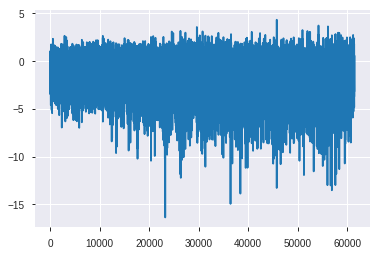

In [74]:
import matplotlib.pyplot as plt
plt.plot(valid.iloc[1].values)


In [79]:
#fenetrage
def dif_val_mean(df):
    mat = []
    for k in df.index: 
        l = df.iloc[k].values
        mn = np.mean(l)
        mat.append(sum([ num for num in l if num > mn])- sum([ num for num in l if num < mn]))
    return(mat)

In [80]:
dfeat['dif_val_mean']=dif_val_mean(train)

In [81]:
dfeatest['dif_val_mean']=dif_val_mean(valid)

In [95]:
dfeat['dif_val_mean'][1211]*dfeat['corr'][1211] #### Multiplier par corr ?? 

-93.62627665299455

In [97]:
dfeatest['dif_val_mean'][470]*dfeatest['corr'][470]

98264.88722242124

In [96]:
np.argmin(dfeatest['dif_val_mean'])

470

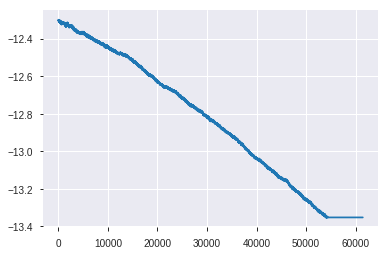

In [275]:
plt.plot(valid.iloc[310].values)


In [100]:
def dif_val_mean_f(df):
    fn = np.arange(0,61440,1024)
    matmax = []
    matmin= []
    for k in df.index: 
        l = []
        for j in fn:
            val = df.iloc[k].values[j:j+1024]
            mn = np.mean(val)
            l.append(sum([ num for num in val if num > mn])- sum([ num for num in val if num < mn]))
        matmax.append(np.max(l))
        matmin.append(np.min(l))
    return(matmax,matmin)

In [101]:
dfeat['max_val_mean'],dfeat['min_val_mean'] =dif_val_mean_f(train)

In [102]:
dfeatest['max_val_mean'],dfeatest['min_val_mean'] =dif_val_mean_f(valid)

In [157]:
def dif_meanstd_f(df):
    fn = np.arange(0,61440,1024)
    mat = []    
    for k in df.index: 
        l = []
        for j in fn:
            val = df.iloc[k].values[j:j+1024]
            l.append(np.mean(val)/np.std(val))
        mat.append(np.max(l)-np.min(l))
    return(mat)

In [158]:
dfeat['dif_meanstd_f'] =dif_meanstd_f(train)

In [159]:
dfeatest['dif_meanstd_f'] =dif_meanstd_f(valid)

In [213]:
def cntpic(o,df):
    l =[]
    val = []
    for k in df.index:
        value =[]
        s =0
        dfx = df.iloc[k].values
        mnost = abs(np.mean(dfx))+ o*np.std(dfx)
        for j in dfx:
            if abs(j) > mnost:
                value.append(abs(j))
                s = s+1
        if value == []:
            val.append(0)
        else:
            val.append(np.max(value) - np.min(value))
        l.append(s)
    return(l,val)

In [214]:
dfeat['cntpic'],dfeat['difvalpic'] =cntpic(6,train)

In [215]:
dfeatest['cntpic'],dfeatest['difvalpic'] =cntpic(6,valid)

In [ ]:
## Score outlier = cntpic/ difvalpic

In [226]:
dfeat.to_csv('/home/sid2018-1/Bureau/Défi IA anomaly Detection/feattrain',header=True, index= False)
dfeatest.to_csv('/home/sid2018-1/Bureau/Défi IA anomaly Detection/featvalid',header=True, index= False)

In [217]:
dfeat.head()

,corr,pvalue,max,mean,nrj,cntpic,difvalpic,maxmeanf,minmeanf,difmeanf,...,distbar,rap_em,max_scaled,std,rap_mean_std,dif_val_mean,max_val_mean,min_val_mean,dif_meanstd_f,dif_val_mean_x_corr
0,-0.007502,0.062950,0.299668,0.039373,133.393818,77,0.110747,0.040782,0.037426,0.003356,...,0.640001,0.000051,0.338492,0.038162,1.031709,836.061886,67.795550,3.404924,5.703836,-6.272239
1,-0.000724,0.857549,1.423423,0.003725,29724.135184,0,0.000000,0.008030,-0.002860,0.010889,...,0.066268,0.011318,1.580572,0.756524,0.004924,38180.406954,692.896559,246.620279,0.030010,-27.648698
2,0.000497,0.901988,1.748343,0.012775,44641.603935,0,0.000000,0.021243,0.001349,0.019894,...,0.219557,0.016998,2.008943,0.930149,0.013734,46042.538459,961.517680,155.625127,0.031504,22.875961
3,0.000057,0.988752,0.748198,0.004919,1294.066504,0,0.000000,0.006630,0.002543,0.004087,...,0.495560,0.000493,0.818716,0.161808,0.030399,7015.977239,353.276144,92.946549,0.036291,0.399060
4,0.002233,0.579891,1.402794,0.032258,26504.807403,0,0.000000,0.081051,-0.001630,0.082681,...,0.042746,0.010092,1.581295,0.718658,0.044886,36126.182583,708.320777,318.800103,0.227171,80.678383


In [218]:
dfeatest.head()

,corr,pvalue,max,mean,nrj,cntpic,difvalpic,maxmeanf,minmeanf,difmeanf,...,distbar,rap_em,max_scaled,std,rap_mean_std,dif_val_mean,max_val_mean,min_val_mean,dif_meanstd_f,dif_val_mean_x_corr
0,0.150945,6.969558e-310,0.382998,0.007689,4.498642e+02,0,0.000000,0.052551,-0.049249,0.101799,...,0.552613,0.000171,0.403524,0.096976,0.079289,4171.234848,89.374821,44.914854,1.333214,629.627367
1,-0.120029,6.709291e-196,16.348537,-1.922069,4.010436e+05,11,4.128357,-1.395629,-2.667656,1.272027,...,2.979689,0.152706,4.717575,1.836290,-1.046713,76570.839296,1575.204094,1047.670365,0.371713,-9190.690588
2,0.000980,8.080537e-01,0.663285,-0.008438,2.528157e+03,0,0.000000,-0.004839,-0.013254,0.008415,...,0.451287,0.000963,0.773018,0.223660,-0.037727,10741.364298,214.912961,93.121062,0.060336,10.527795
3,-0.003233,4.229623e-01,0.469974,0.000922,2.314744e+02,4,0.092352,0.012329,-0.009554,0.021882,...,0.583229,0.000088,0.549403,0.072420,0.012737,2962.768382,84.389671,30.075087,0.255353,-9.577913
4,0.271010,0.000000e+00,31.633011,-7.428013,4.761093e+06,0,0.000000,-3.010820,-9.914334,6.903514,...,11.526486,1.812890,8.358938,5.235373,-1.418812,184098.042070,4239.248612,1278.078820,1.048539,49892.413938


In [202]:
lbh= [ num for num,j in enumerate(dfeatest['dif_val_mean']) if j >0] 

In [ ]:
for k in lbh:
    plt.plot(train.iloc[k].values)
    plt.figure(figsize= (5,5))

**Normalisation ?**

In [205]:
j = [0.5,0.9,4,21]
s= []
i =0
while i<100:
    k = np.random.uniform(-1, 1)
    v = k*np.array(j)
    s.append((np.mean(j)/np.std(j))-(np.mean(v)/np.std(v)))    
    i += 1

In [166]:
max(s)

1.5670484673938585

## Apprentissage

In [227]:
to_keep = ['cntpic','corr','dif_meanstd_f','dif_val_mean','difmeanf','difvalpic','rap_mean_std','max_val_mean','dif_val_mean_x_corr','score_outlier']

In [228]:
dftrain = dfeat[to_keep]

In [229]:
dftest = dfeatest[to_keep]

In [230]:
dftrain['corr']= np.abs(dftrain['corr'].values)
dftest['corr']= np.abs(dftest['corr'].values)

In [233]:
dftrain['rap_mean_std']= np.abs(dftrain['rap_mean_std'].values)
dftest['rap_mean_std']= np.abs(dftest['rap_mean_std'].values)

In [234]:
dftrain['dif_val_mean_x_corr']= np.abs(dftrain['dif_val_mean_x_corr'].values)
dftest['dif_val_mean_x_corr']= np.abs(dftest['dif_val_mean_x_corr'].values)

In [235]:
dftrain.head()

,cntpic,corr,dif_meanstd_f,dif_val_mean,difmeanf,difvalpic,rap_mean_std,max_val_mean,dif_val_mean_x_corr,score_outlier
0,77,0.007502,5.703836,836.061886,0.003356,0.110747,1.031709,67.795550,6.272239,695.279163
1,0,0.000724,0.030010,38180.406954,0.010889,0.000000,0.004924,692.896559,27.648698,0.000000
2,0,0.000497,0.031504,46042.538459,0.019894,0.000000,0.013734,961.517680,22.875961,0.000000
3,0,0.000057,0.036291,7015.977239,0.004087,0.000000,0.030399,353.276144,0.399060,0.000000
4,0,0.002233,0.227171,36126.182583,0.082681,0.000000,0.044886,708.320777,80.678383,0.000000


In [236]:
dftest.head()

,cntpic,corr,dif_meanstd_f,dif_val_mean,difmeanf,difvalpic,rap_mean_std,max_val_mean,dif_val_mean_x_corr,score_outlier
0,0,0.150945,1.333214,4171.234848,0.101799,0.000000,0.079289,89.374821,629.627367,0.000000
1,11,0.120029,0.371713,76570.839296,1.272027,4.128357,1.046713,1575.204094,9190.690588,2.664498
2,0,0.000980,0.060336,10741.364298,0.008415,0.000000,0.037727,214.912961,10.527795,0.000000
3,4,0.003233,0.255353,2962.768382,0.021882,0.092352,0.012737,84.389671,9.577913,43.312617
4,0,0.271010,1.048539,184098.042070,6.903514,0.000000,1.418812,4239.248612,49892.413938,0.000000


In [ ]:
# Estimation de la tendance et calcul des corrélations et du coef directeur
from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(X, Y)


# LOF

**unsupervised**

### KDE 

**semi-supervised**

In [239]:
drop_ft = ['cntpic','difvalpic','dif_val_mean','difmeanf']
trnkde = dftrain.drop(drop_ft,axis=1)
testkde = dftest.drop(drop_ft,axis=1)

In [262]:
from sklearn import preprocessing
mm_scaler = preprocessing.MinMaxScaler()

In [263]:
trnkdesc = mm_scaler.fit_transform(trnkde)
testkdesc = mm_scaler.transform(testkde)

In [266]:
from sklearn.neighbors import KernelDensity
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(KernelDensity(),
                    {'bandwidth': np.linspace(0.001, 1, 100)},
                    cv=20) # 20-fold cross-validation
grid.fit(trnkdesc)
print (grid.best_params_)

{'bandwidth': 0.021181818181818184}


In [267]:
ytrain = np.zeros(len(dfeat))

In [268]:
kde = grid.best_estimator_
scores =  -kde.score_samples(testkdesc)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

### Isolation Forest

**unsupervised**

**semi-supervised**

### One class SVM

In [ ]:
## Add auto correlation as feature and the value of the window who gives the best or least value 

### Auto-encoder